<a href="https://colab.research.google.com/github/Triginarsa/skin-cancer/blob/fandi-branch/Skin_Cancer_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT DATASET SKIN CANCER MNIST HAM 10K


Input Data 

The input data are dermoscopic lesion images in JPEG format.

All lesion images are named using the scheme ISIC_<image_id>.jpg, where <image_id> is a 7-digit unique identifier. EXIF tags in the images have been removed; any remaining EXIF tags should not be relied upon to provide accurate metadata.

The lesion images were acquired with a variety of dermatoscope types, from all anatomic sites (excluding mucosa and nails), from a historical sample of patients presented for skin cancer screening, from several different institutions. Every lesion image contains exactly one primary lesion; other fiducial markers, smaller secondary lesions, or other pigmented regions may be neglected.

The distribution of disease states represent a modified “real world” setting whereby there are more benign lesions than malignant lesions, but an over-representation of malignancies.

The images in the data-set are separated into the following seven types of skin cancer:

**Actinic keratosis** **(akiec) **is considered to be a noncancerous (benign) type of skin cancer. However, if left untreated, it usually develops into squamous cell carcinoma (which is cancerous).

**Unlike actinic keratosis** **(bcc)**, basal cell carcinoma is a cancerous type of skin lesion that develops in the basal cell layer located in the lower part of the epidermis. It is the most common type of skin cancer accounting for 80% of all cases.

**Benign keratosis** **(bkl)** is a noncancerous and slow-growing type of skin cancer. They can be left untreated as they are typically harmless.

**Dermatofibromas** **(df)** are also noncancerous and usually harmless, thus no treatment is required. It is commonly found pinkish in color and appears like a round bump.

**Melanoma** **(mel)** is a type of malignant skin cancer that originated from melanocytes, cells that are responsible for the pigment of your skin.

**Melanocytic** **(nv)** nevi are a benign type of melanocytic tumor. Patients with melanocytic nevi are considered to be at a higher risk of melanoma.

**Vascular** **(vasc)** lesions are composed of a wide range of skin lesion including cherry angiomas, angiokeratomas, and pyogenic granulomas. They are similarly characterized as being red or purple in color and often appear as a raised bump.

In [0]:
! pip install -q kaggle

In [0]:
# import your token from kaggle
from google.colab import files
files.upload()

In [0]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [0]:
!kaggle datasets download -d kmader/skin-cancer-mnist-ham10000
!unzip skin-cancer-mnist-ham10000

# PREPROCESSING DATASET

In [5]:
import os
# Checking content folder
content_folder = os.listdir('../content')
print(content_folder)


['.config', 'hmnist_8_8_RGB.csv', 'kaggle.json', 'ham10000_images_part_1', 'hmnist_28_28_RGB.csv', 'HAM10000_images_part_1', 'hmnist_28_28_L.csv', 'skin-cancer-mnist-ham10000.zip', 'HAM10000_metadata.csv', 'HAM10000_images_part_2', 'ham10000_images_part_2', 'hmnist_8_8_L.csv', 'sample_data']


In [0]:
base_dir = 'base_dir'
os.mkdir(base_dir)

In [0]:
# train_dir
train_dir = os.path.join(base_dir, 'train_dir')
os.mkdir(train_dir)

# val_dir
val_dir = os.path.join(base_dir, 'val_dir')
os.mkdir(val_dir)

In [0]:
# train subdir
nv = os.path.join(train_dir, 'nv')
os.mkdir(nv)
mel = os.path.join(train_dir, 'mel')
os.mkdir(mel)
bkl = os.path.join(train_dir, 'bkl')
os.mkdir(bkl)
bcc = os.path.join(train_dir, 'bcc')
os.mkdir(bcc)
akiec = os.path.join(train_dir, 'akiec')
os.mkdir(akiec)
vasc = os.path.join(train_dir, 'vasc')
os.mkdir(vasc)
df = os.path.join(train_dir, 'df')
os.mkdir(df)

In [0]:
# val subdir 
nv = os.path.join(val_dir, 'nv')
os.mkdir(nv)
mel = os.path.join(val_dir, 'mel')
os.mkdir(mel)
bkl = os.path.join(val_dir, 'bkl')
os.mkdir(bkl)
bcc = os.path.join(val_dir, 'bcc')
os.mkdir(bcc)
akiec = os.path.join(val_dir, 'akiec')
os.mkdir(akiec)
vasc = os.path.join(val_dir, 'vasc')
os.mkdir(vasc)
df = os.path.join(val_dir, 'df')
os.mkdir(df)

In [10]:
import pandas as pd
df_data = pd.read_csv('../content/HAM10000_metadata.csv')
df_data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


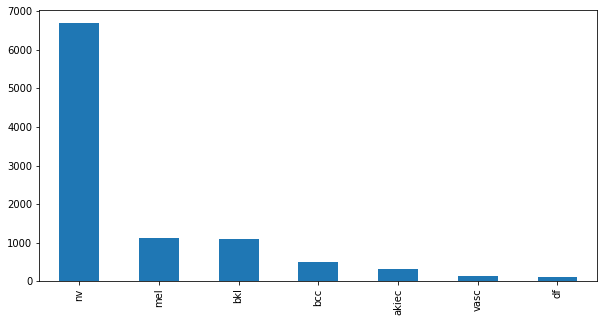

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(1, 1, figsize= (10, 5))
df_data['dx'].value_counts().plot(kind='bar', ax=ax1)

In [11]:
# how many images are associated with each lesion_id
df = df_data.groupby('lesion_id').count()
# have only one image associated with it
df = df[df['image_id'] == 1]
df.reset_index(inplace=True)
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000001,1,1,1,1,1,1
1,HAM_0000003,1,1,1,1,1,1
2,HAM_0000004,1,1,1,1,1,1
3,HAM_0000007,1,1,1,1,1,1
4,HAM_0000008,1,1,1,1,1,1


In [12]:
def identify_duplicates(x):
    unique_list = list(df['lesion_id'])
    if x in unique_list:
        return 'no_duplicates'
    else:
        return 'has_duplicates'
    
# create a new colum that is a copy of the lesion_id column
df_data['duplicates'] = df_data['lesion_id']
# apply the function to this new column
df_data['duplicates'] = df_data['duplicates'].apply(identify_duplicates)

df_data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,duplicates
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,has_duplicates
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,has_duplicates
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,has_duplicates
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,has_duplicates
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,has_duplicates


In [13]:
# count has duplicates and no duplicates
df_data['duplicates'].value_counts()

no_duplicates     5514
has_duplicates    4501
Name: duplicates, dtype: int64

In [14]:
# filter out images that don't have duplicates
df = df_data[df_data['duplicates'] == 'no_duplicates']
df.shape

(5514, 8)

In [15]:
from sklearn.model_selection import train_test_split
# create a val set using df because we are sure that none of these images
# have augmented duplicates in the train set
y = df['dx']
_, df_val = train_test_split(df, test_size=0.17, random_state=101, stratify=y)
df_val.shape

(938, 8)

In [16]:
# count df_val
df_val['dx'].value_counts()

nv       751
bkl       75
mel       39
bcc       30
akiec     26
vasc      11
df         6
Name: dx, dtype: int64

In [0]:
# identify val or train
def identify_val_rows(x):
    # create a list of all the lesion_id's in the val set
    val_list = list(df_val['image_id']) 
    if str(x) in val_list:
        return 'val'
    else:
        return 'train'

In [18]:
# create a new colum that is a copy of the image_id column
df_data['train_or_val'] = df_data['image_id']
# apply the function to this new column
df_data['train_or_val'] = df_data['train_or_val'].apply(identify_val_rows)   
# filter out train rows
df_train = df_data[df_data['train_or_val'] == 'train']
print(len(df_train))
print(len(df_val))

9077
938


In [19]:
# count df_train
df_train['dx'].value_counts() 

nv       5954
mel      1074
bkl      1024
bcc       484
akiec     301
vasc      131
df        109
Name: dx, dtype: int64

In [20]:
# count df_val
df_val['dx'].value_counts() 

nv       751
bkl       75
mel       39
bcc       30
akiec     26
vasc      11
df         6
Name: dx, dtype: int64

In [0]:
# Set the image_id as the index in df_data
df_data.set_index('image_id', inplace=True)

In [0]:
# get datasets
part_1 = os.listdir('../content/ham10000_images_part_1')
part_2 = os.listdir('../content/ham10000_images_part_2')

# Get a list of train and val dataset
train_list = list(df_train['image_id'])
val_list = list(df_val['image_id'])


In [0]:
import shutil
# copy image train
for image in train_list:
    fname = image + '.jpg'
    label = df_data.loc[image,'dx']
    if fname in part_1:
        src = os.path.join('../content/ham10000_images_part_1', fname)
        dst = os.path.join(train_dir, label, fname)
        shutil.copyfile(src, dst)

    if fname in part_2:
        src = os.path.join('../content/ham10000_images_part_2', fname)
        dst = os.path.join(train_dir, label, fname)
        shutil.copyfile(src, dst)

In [0]:
# copy image val
for image in val_list:
    fname = image + '.jpg'
    label = df_data.loc[image,'dx']
    
    if fname in part_1:
        src = os.path.join('../content/ham10000_images_part_1', fname)
        dst = os.path.join(val_dir, label, fname)
        shutil.copyfile(src, dst)

    if fname in part_2:
        src = os.path.join('../content/ham10000_images_part_2', fname)
        dst = os.path.join(val_dir, label, fname)
        shutil.copyfile(src, dst)

In [25]:
# count image train_dir
print(len(os.listdir('base_dir/train_dir/nv')))
print(len(os.listdir('base_dir/train_dir/mel')))
print(len(os.listdir('base_dir/train_dir/bkl')))
print(len(os.listdir('base_dir/train_dir/bcc')))
print(len(os.listdir('base_dir/train_dir/akiec')))
print(len(os.listdir('base_dir/train_dir/vasc')))
print(len(os.listdir('base_dir/train_dir/df')))

5954
1074
1024
484
301
131
109


In [26]:
# count image val_dir
print(len(os.listdir('base_dir/val_dir/nv')))
print(len(os.listdir('base_dir/val_dir/mel')))
print(len(os.listdir('base_dir/val_dir/bkl')))
print(len(os.listdir('base_dir/val_dir/bcc')))
print(len(os.listdir('base_dir/val_dir/akiec')))
print(len(os.listdir('base_dir/val_dir/vasc')))
print(len(os.listdir('base_dir/val_dir/df')))

751
39
75
30
26
11
6


In [0]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [0]:
TRAIN_DIR = 'base_dir/train_dir'
VAL_DIR = 'base_dir/val_dir'
BATCH_SIZE = 10
IMAGE_SIZE = 150
NUMBER_TRAIN_SAMPLES = len(df_train)
NUMBER_VAL_SAMPLES = len(df_val)
TRAIN_STEPS = np.ceil(NUMBER_TRAIN_SAMPLES / BATCH_SIZE)
VAL_STEP = np.ceil(NUMBER_VAL_SAMPLES / BATCH_SIZE)

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      vertical_flip =True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

In [68]:
train_generator = train_datagen.flow_from_directory(TRAIN_DIR,
                                                    batch_size = BATCH_SIZE,
                                                    target_size = (IMAGE_SIZE, IMAGE_SIZE),
                                                    class_mode = 'categorical')

Found 9077 images belonging to 7 classes.


In [69]:
validation_generator = train_datagen.flow_from_directory(VAL_DIR,
                                                    batch_size = BATCH_SIZE,
                                                    target_size = (IMAGE_SIZE, IMAGE_SIZE),
                                                    class_mode = 'categorical')

Found 938 images belonging to 7 classes.


# BUILD MODEL

In [38]:
mobile = tf.keras.applications.mobilenet.MobileNet()

17227776/17225924 [==============================] - 0s 0us/step


In [40]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [43]:
mobile.layers

In [44]:
len(mobile.layers)

93

In [0]:
# Architecture model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Model
x = mobile.layers[-6].output
x = Dropout(0.25)(x)
predictions = Dense(7, activation='softmax')(x)
model = Model(inputs=mobile.input, outputs=predictions)

In [51]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128 

In [0]:
# The last 23 layers of the model will be trained
for layer in model.layers[:-23]:
    layer.trainable = False

In [0]:
from tensorflow.keras.metrics import categorical_accuracy, top_k_categorical_accuracy

def top_3_accuracy(y_true, y_pred):
    return top_k_categorical_accuracy(y_true, y_pred, k=3)

def top_2_accuracy(y_true, y_pred):
    return top_k_categorical_accuracy(y_true, y_pred, k=2)

In [0]:
from tensorflow.keras.optimizers import Adam
model.compile(Adam(lr=0.01), loss='categorical_crossentropy', 
              metrics=[categorical_accuracy, top_2_accuracy, top_3_accuracy])

In [0]:

# Add weights to try to make the model more sensitive to melanoma

class_weights={
    0: 1.0, # akiec
    1: 1.0, # bcc
    2: 1.0, # bkl
    3: 1.0, # df
    4: 3.0, # mel # Try to make the model more sensitive to Melanoma.
    5: 1.0, # nv
    6: 1.0, # vasc
}

In [0]:
train_datagen = ImageDataGenerator(
    preprocessing_function= \
    tf.keras.applications.mobilenet.preprocess_input)

In [64]:
train_batches = train_datagen.flow_from_directory(TRAIN_DIR,
                                            target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                            batch_size=BATCH_SIZE)

Found 9077 images belonging to 7 classes.


In [72]:
valid_batches = train_datagen.flow_from_directory(VAL_DIR,
                                            target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                            batch_size=BATCH_SIZE)

Found 938 images belonging to 7 classes.


In [0]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
filepath = "model.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_top_3_accuracy', verbose=1, 
                             save_best_only=True, mode='max')

reduce_lr = ReduceLROnPlateau(monitor='val_top_3_accuracy', factor=0.5, patience=2, 
                                   verbose=1, mode='max', min_lr=0.00001)
                              
                              
callbacks_list = [checkpoint, reduce_lr]

history = model.fit_generator(train_batches, steps_per_epoch=TRAIN_STEPS, 
                              class_weight=class_weights,
                              validation_data=valid_batches,
                              validation_steps=VAL_STEP,
                              epochs=30, verbose=1,
                              callbacks=callbacks_list)

# EVALUATE

In [0]:
model.metrics_names
val_loss, val_cat_acc, val_top_2_acc, val_top_3_acc = \
model.evaluate_generator(test_batches, 
                        steps=len(df_val))

print('val_loss:', val_loss)
print('val_cat_acc:', val_cat_acc)
print('val_top_2_acc:', val_top_2_acc)
print('val_top_3_acc:', val_top_3_acc)

model.load_weights('model.h5')

val_loss, val_cat_acc, val_top_2_acc, val_top_3_acc = \
model.evaluate_generator(test_batches, 
                        steps=len(df_val))

print('val_loss:', val_loss)
print('val_cat_acc:', val_cat_acc)
print('val_top_2_acc:', val_top_2_acc)
print('val_top_3_acc:', val_top_3_acc)

In [0]:
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
train_top2_acc = history.history['top_2_accuracy']
val_top2_acc = history.history['val_top_2_accuracy']
train_top3_acc = history.history['top_3_accuracy']
val_top3_acc = history.history['val_top_3_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()

plt.plot(epochs, acc, 'bo', label='Training cat acc')
plt.plot(epochs, val_acc, 'b', label='Validation cat acc')
plt.title('Training and validation cat accuracy')
plt.legend()
plt.figure()


plt.plot(epochs, train_top2_acc, 'bo', label='Training top2 acc')
plt.plot(epochs, val_top2_acc, 'b', label='Validation top2 acc')
plt.title('Training and validation top2 accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, train_top3_acc, 'bo', label='Training top3 acc')
plt.plot(epochs, val_top3_acc, 'b', label='Validation top3 acc')
plt.title('Training and validation top3 accuracy')
plt.legend()


plt.show()

# VISUALIZATION